# Apresentação:

O objetivo desse notebook iniciar os estudos sobre _deep learning_ aplicado ao no contexto de mercado financeiro.

**Nota:** O mercado financeiro usa de uma base estatística muito forta, mudando apenas o vocabulário.

## Material Base:

O Material base aqui utilizao será.

* [Deep Learning for Finance](https://static1.squarespace.com/static/5530dddfe4b0679504639dc1/t/65f1429a4aa350127cd09867/1710310105059/Deep+Learning+for+Finance+-+Sofien.pdf.pdf) de _Sofien Kaabar_

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Entendendo Dados:

O entendimento da **ciência de dados começa** pela compreensão dos tipos e estruturas de dados, que são coleções de informações brutas usadas para tomada de decisões. O processo envolve desde a coleta até a interpretação dos dados para embasar escolhas. Um exemplo prático é a análise de um portfólio de ações com diferentes rendimentos de dividendos, onde calcular a média dos dividendos permite uma visão rápida do retorno geral do investimento.

Antes de discutir ciência de dados, vamos revisar quais tipos de dados podem ser usados e segmentá-los em diferentes grupos:

**Dados numéricos:**  
Este tipo de dado é composto por números que refletem um determinado tipo de informação coletada em intervalos regulares ou irregulares. Exemplos incluem dados de mercado (OHLC, volume, spreads, etc.) e dados de demonstrações financeiras (ativos, receita, custos, etc.).

**Dados categóricos:**  
Dados categóricos são dados que podem ser organizados em grupos ou categorias usando nomes ou rótulos. São qualitativos, em vez de quantitativos. Por exemplo, o tipo sanguíneo de pacientes é um tipo de dado categórico. Outro exemplo é a cor dos olhos de diferentes amostras de uma população.

**Dados de texto:**  
Os dados de texto têm crescido nos últimos anos com o desenvolvimento do processamento de linguagem natural (PLN). Modelos de aprendizado de máquina usam dados de texto para traduzir, interpretar e analisar o sentimento do texto.

**Dados visuais:**  
Imagens e vídeos também são considerados dados, e você pode processá-los e transformá-los em informações valiosas. Por exemplo, uma rede neural convolucional (CNN) é um tipo de algoritmo (discutido no Capítulo 8) que pode reconhecer e categorizar fotos por rótulos (por exemplo, rotular fotos de gatos como "gatos").

**Dados de áudio:**  
Os dados de áudio são muito valiosos e podem ajudar a economizar tempo em transcrições. Por exemplo, você pode usar algoritmos em áudio para criar legendas e gerar automaticamente legendas. Você também pode criar modelos que interpretam o sentimento do falante usando o tom e o volume do áudio.

In [ ]:
# Rendimento de dividendos
Dividend_yield = [5.2,3.99,4.12,6.94,5.55] # em %
stock = ["A","B","C","D", "E"]

# Criando o DataFrame
df = pd.DataFrame(list(zip(stock, Dividend_yield)),
                  columns=["Stock", "Dividend Yield"])

df

,Stock,Dividend Yield
0,A,5.20
1,B,3.99
2,C,4.12
3,D,6.94
4,E,5.55


Uma estatística muito usada para sumarizar a informação dos dados é a média.

$$E(X)=\frac{1}{n}\sum_{i = 1}^nx$$


In [ ]:
# Calculando Rendimento médio de dividendos
df["Dividend Yield"].sum()/df["Dividend Yield"].count()

5.160000000000001

In [ ]:
soma = 0
for i in df["Dividend Yield"]:
    soma += i
n = len(df["Dividend Yield"])
print(soma/n)

5.160000000000001


In [ ]:
# De forma mais simples
df["Dividend Yield"].mean()

5.160000000000001

Embora essas métricas sejam bem básicas, como a média e a contagem, elas fazem parte da estatística descritiva, que é fundamental para a construção de modelos mais complexos. Muitas vezes, uma análise simples já é suficiente para entender a situação, como quando calculei a correlação entre duas _commodities_ e busquei prever se a correlação no próximo ano será positiva ou negativa.

In [ ]:
# Construindo dataframe:
correlation_data = {
    2015: "Positive",
    2016: "Positive",
    2017: "Positive",
    2018: "Negative",
    2019: "Positive",
    2020: "Positive",
    2021: "Positive",
    2022: "Positive",
    2023: "Positive"
}

# Gerando DataFrame:
correlation_df = pd.DataFrame(list(correlation_data.items()), columns=["Year", "Correlation"])
correlation_df

,Year,Correlation
0,2015,Positive
1,2016,Positive
2,2017,Positive
3,2018,Negative
4,2019,Positive
5,2020,Positive
6,2021,Positive
7,2022,Positive
8,2023,Positive


In [ ]:
# Gerando informação numérica:
vector = []
for corr in correlation_df["Correlation"]:
    if corr == "Positive":
      vector.append(1)
    else:
      vector.append(0)


# Calcualndo a esperança de correlação positiva:
E_corr = sum(vector)/len(vector)
print(f"E(Correlação Positiva) = {round(E_corr*100,2)}%")

E(Correlação Positiva) = 88.89%


A **ciência de dados** é um campo transdisciplinar que busca extrair inteligência e conclusões dos dados usando diferentes técnicas e modelos, sejam eles simples ou complexos. O processo de ciência de dados é composto por várias etapas além da simples análise de dados. A seguir, um resumo dessas etapas:

1. **Coleta de dados**: Este processo envolve a aquisição de dados de fontes confiáveis e precisas. Uma frase amplamente conhecida na ciência da computação, geralmente atribuída a George Fuechsel, diz: "Garbage in, garbage out" ("Lixo entra, lixo sai"), e se refere à necessidade de ter dados de qualidade nos quais você possa confiar para uma análise adequada. Basicamente, se você tiver dados imprecisos ou defeituosos, todos os seus processos serão inválidos.

2. **Pré-processamento de dados**: Ocasionalmente, os dados adquiridos podem estar em formato bruto e precisarão ser pré-processados e limpos para que os modelos de ciência de dados possam usá-los. Por exemplo, eliminar dados desnecessários, adicionar valores faltantes ou eliminar dados inválidos e duplicados podem fazer parte dessa etapa. Exemplos mais complexos incluem normalização e redução de ruído dos dados. O objetivo dessa etapa é preparar os dados para análise.

3. **Exploração de dados**: Durante essa etapa, é realizada uma pesquisa estatística básica para identificar tendências e outras características nos dados. Um exemplo de exploração de dados é calcular a média dos dados.

4. **Visualização de dados**: Esta é uma etapa importante que complementa a etapa anterior. Ela inclui a criação de visualizações, como histogramas e mapas de calor, para ajudar a identificar padrões e tendências e facilitar a interpretação.

5. **Análise de dados**: Esta é a etapa principal do processo de ciência de dados. É quando você ajusta (treina) os dados usando diferentes modelos de aprendizado para que eles interpretem e prevejam o resultado futuro com base nos parâmetros fornecidos.

6. **Interpretação de dados**: Esta etapa trata de entender o feedback e as conclusões apresentadas pelos modelos de ciência de dados. A otimização também pode fazer parte dessa etapa; nesses casos, voltamos à etapa 5 e executamos os modelos novamente com os parâmetros atualizados, antes de reinterpretá-los e avaliar o desempenho.

## Análise e Previsão do Índice de Volatilidade (VIX) Usando o Processo de Ciência de Dados

Um exemplo simples em **Python** descreve o processo de **ciência de dados** aplicado à análise e previsão do **VIX** (**índice de volatilidade**), um indicador que mede a volatilidade implícita do **índice S&P 500** e é frequentemente chamado de **"índice do medo"** devido à sua correlação com a incerteza e turbulência do mercado. O **VIX** é calculado com base no preço das opções do **S&P 500**, sendo que **valores mais altos indicam maior incerteza** e **valores mais baixos refletem maior estabilidade**. O primeiro passo do processo de ciência de dados é a coleta de dados, que neste caso pode ser automatizada com Python. O código necessário para baixar os dados históricos do VIX, entre 1º de janeiro de 1990 e 23 de janeiro de 2023, é mencionado como exemplo, embora os detalhes do código não sejam o foco no momento.

**Nota:**

Também há uma etapa oculta no processo de **ciência de dados** que eu chamo de etapa _zero_, e ela ocorre quando você forma uma ideia sobre qual processo deve ser iniciado. Afinal, você não aplicaria o processo se não tivesse uma motivação primeiro. Por exemplo, acreditar que os números da inflação podem influenciar os retornos de certas _commodities_ é uma ideia e uma motivação para começar a explorar os dados em busca de números reais que comprovem essa hipótese.


In [ ]:
# Importando as bibliotecas referidas:
import pandas_datareader as pdr

In [ ]:
# Setando o inicio e o fim dos dados históricos:
start_date = "1990-01-01"
end_date = "2025-12-12"

In [ ]:
# Aquisitando dado:
vix = pdr.DataReader("VIXCLS", "fred", start_date, end_date)
vix

,VIXCLS
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2025-03-04,23.51
2025-03-05,21.93
2025-03-06,24.87


O segundo passo aqui avaliar o conjunto de dados. Esta etapa é dividida em verificar a integridade dos dados e transformar os dados para torná-los prontos para uso.

In [ ]:
# Calculando o numero de nan:
count_nan = vix["VIXCLS"].isnull().sum()
print("Numero de valores nan no conjunto de dados: " + str(count_nan))

Numero de valores nan no conjunto de dados: 298


Uma outra forma útil de analisar esse conjunto de dados é com o método `info()` que dá um panorama geral dos metadados.

In [ ]:
vix.info("columns")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9180 entries, 1990-01-02 to 2025-03-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VIXCLS  8882 non-null   float64
dtypes: float64(1)
memory usage: 143.4 KB


Existem várias formas de se abordar a questão de dados faltantes, nan (Not a Number). Isso é uma ciência a parte. Aqui o texto opta por simplesmente apagá-los.

In [ ]:
# Dropando dados faltantes:
vix = vix.dropna()

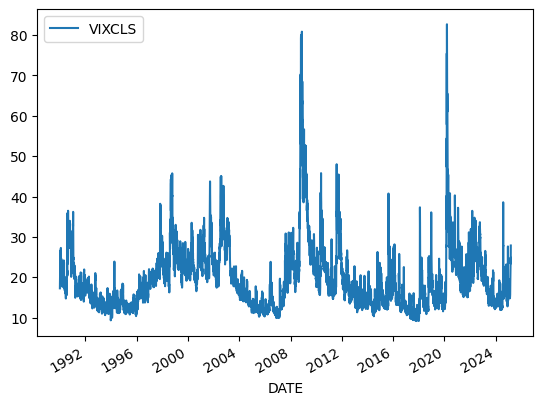

In [ ]:
# Visualizando dados
vix.plot();

A segunda parte da segunda etapa é transformar os dados. Modelos de **ciência de dados** geralmente exigem dados **estacionários**, ou seja, dados com propriedades estatísticas estáveis, como a **média**.

Para transformar os dados do **VIX** em dados **estacionários**, você pode simplesmente calcular as diferenças entre um valor e o valor anterior. O trecho de código a seguir pega o dataframe do VIX e o transforma em dados teoricamente estacionários.

**Nota:**
O conceito de **estacionariedade** e as métricas estatísticas necessárias são discutidos em detalhes no **Capítulo 3**. Por enquanto, o que você precisa saber é que é provável que você tenha que transformar seus dados brutos em dados estacionários ao usar modelos de ciência de dados.

In [ ]:
# Tomando as diferenças na tentativa de tornar os dados estacionários
vix = vix.diff(periods=1, axis=0)

Esse processo resulta na primeira entrada como um `nan`, o que não queremos em nosso conjunto de dados.

In [ ]:
# droppando o primeira entrada do dataframe:
vix = vix.iloc[1:,:];vix

,VIXCLS
DATE,
1990-01-03,0.95
1990-01-04,1.03
1990-01-05,0.89
1990-01-08,0.15
1990-01-09,1.94
...,...
2025-03-04,0.73
2025-03-05,-1.58
2025-03-06,2.94


A terceira etapa é a exploração de dados, que consiste em entender os dados que você tem à sua frente, do ponto de vista estatístico. Como você verá as métricas estatísticas em detalhes no Capítulo 3, vou limitar a discussão apenas ao cálculo da média do conjunto de dados.  
A média é simplesmente o valor que pode representar os outros valores no conjunto de dados se eles tivessem que eleger um líder. É a soma dos valores dividida pela quantidade deles. A média é a estatística mais simples no mundo da estatística descritiva, e definitivamente a mais usada. A seguinte fórmula mostra a representação matemática da média de um conjunto de valores:  
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$  
Você pode calcular facilmente a média do conjunto de dados da seguinte forma:

In [ ]:
# Calculando a média do conjunto de dados:
mean = vix["VIXCLS"].mean()
print("Média do conjunto de dados: " + str(mean))

Média do conjunto de dados: 0.0011958112825132309


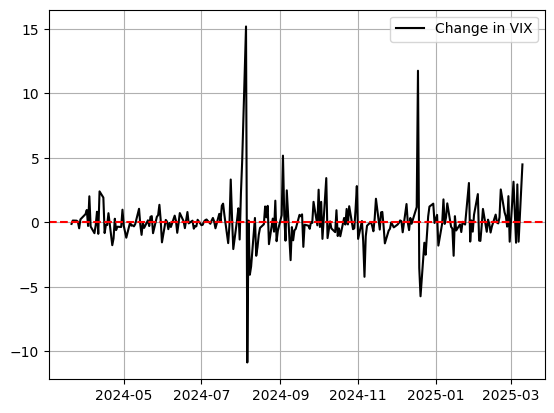

In [ ]:
# Traçando observações (Ultimas 250 amostras):
plt.plot(vix[-250:], color = 'black', linewidth = 1.5,  label = 'Change in VIX')

# Traçando a média:
plt.axhline(y = mean, color = 'red', linestyle = 'dashed')

# Setando configurações do gráfico:
plt.grid()
plt.legend()
plt.show()